In [1]:
import numpy as np
import pandas as pd
import librosa
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

## converting the wav files in to a machine readable format

In [2]:
list_of_sounds = []

In [3]:
forward = []
back = []
left = []
right = []
stop = []

In [4]:
def audio_array(mylist,address):
    files = librosa.util.find_files("C:/Users/Asus/Desktop/recordings/{}".format(address),ext = ['wav'])
    files = np.asarray(files)
    for audio in files:
        sound,sample_rate = librosa.load(audio,sr=16000,res_type='kaiser_fast')
        mylist.append([sound,address])

In [5]:
audio_array(forward,"Forward")
audio_array(back,"back")
audio_array(left,"Left")
audio_array(right,"Right")
audio_array(stop,"Stop")

# understanding the audio by visualising it

In [6]:
import librosa.display
def show_plot(sample):
    x = sample[0]
    plt.figure(figsize=(12,4))
    librosa.display.waveplot(x, sr=16000)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(20, 15))
    librosa.display.specshow(Xdb, sr=16000, x_axis='time', y_axis='hz')
    plt.colorbar()

## wave plot and spectrogram of the sound "forward"

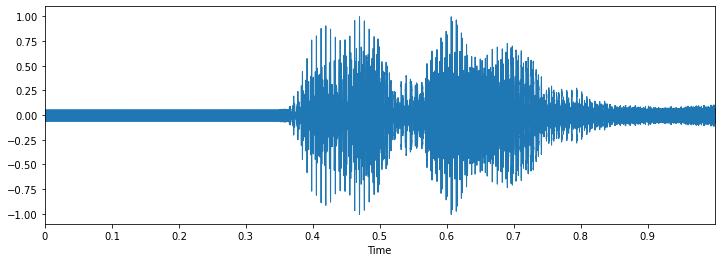

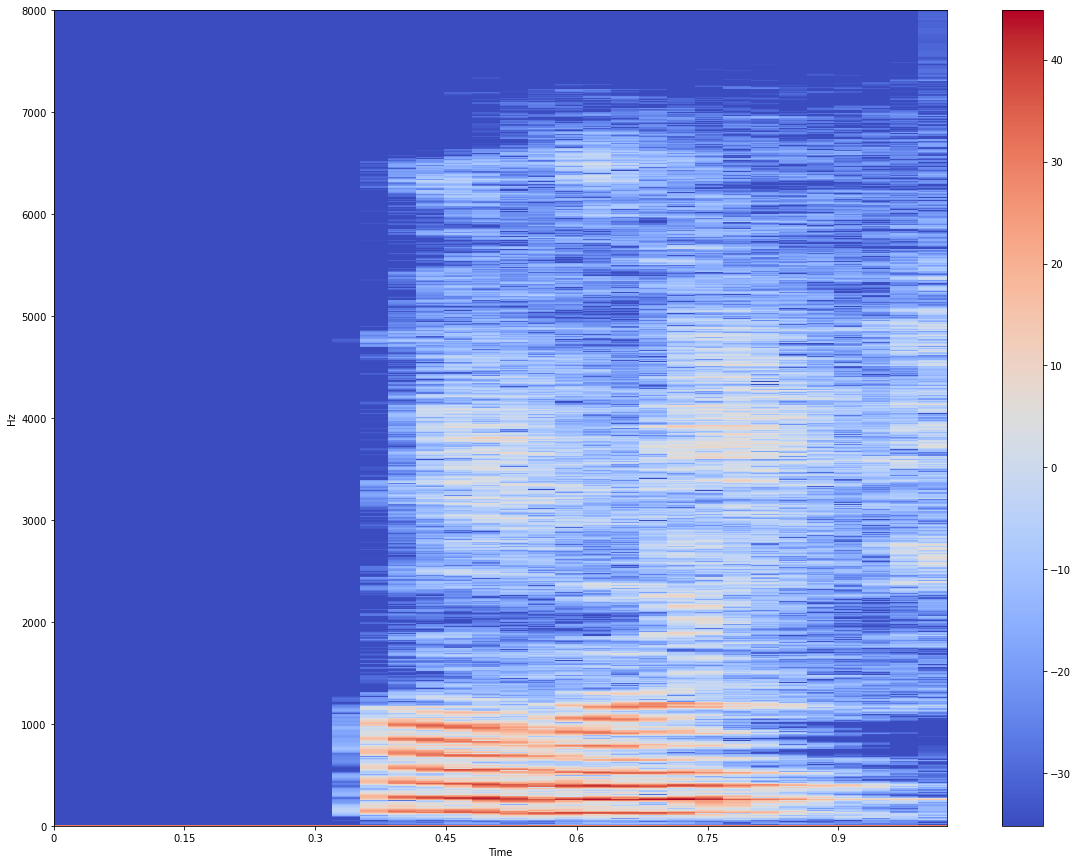

In [7]:
show_plot(forward[0])

## wave plot and spectrogram of the sound "Back"

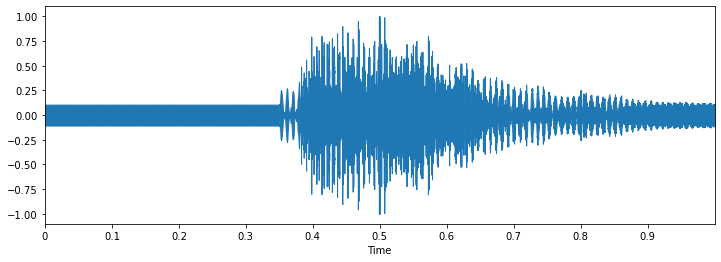

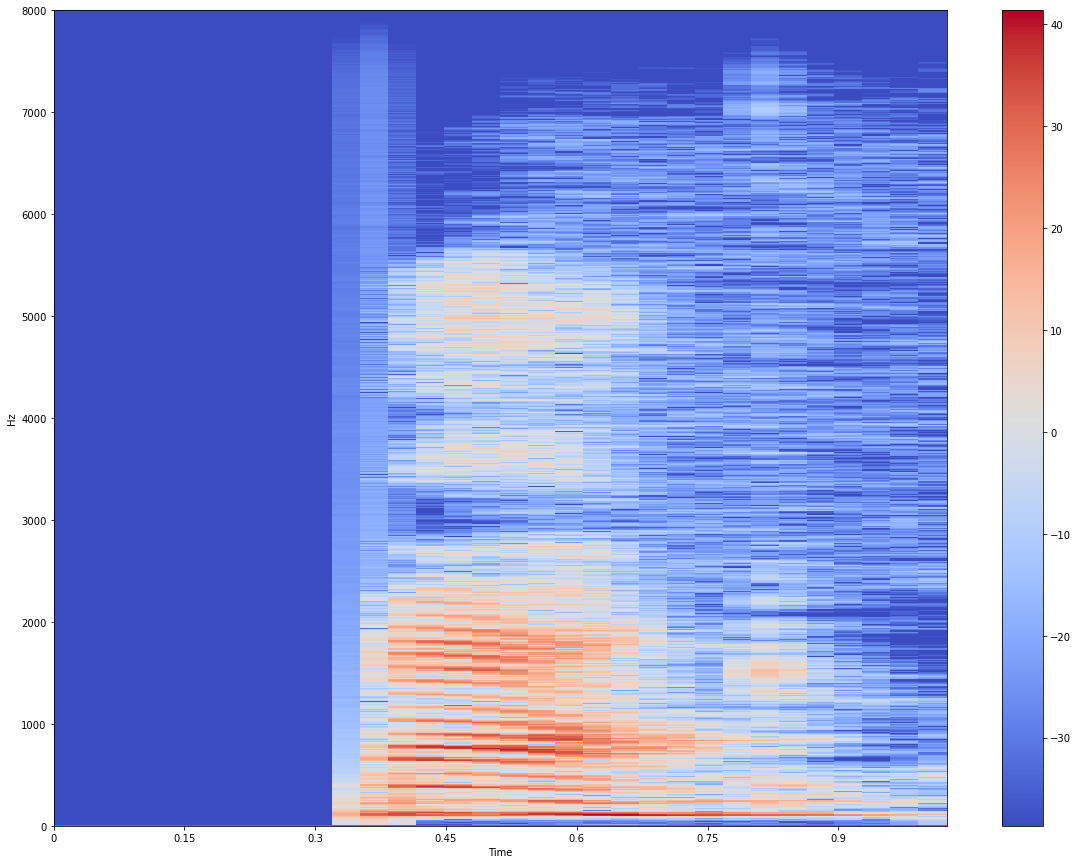

In [8]:
show_plot(back[0])

## wave plot and spectrogram of the sound "Left"

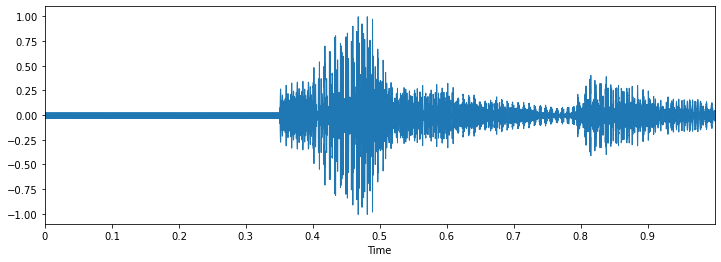

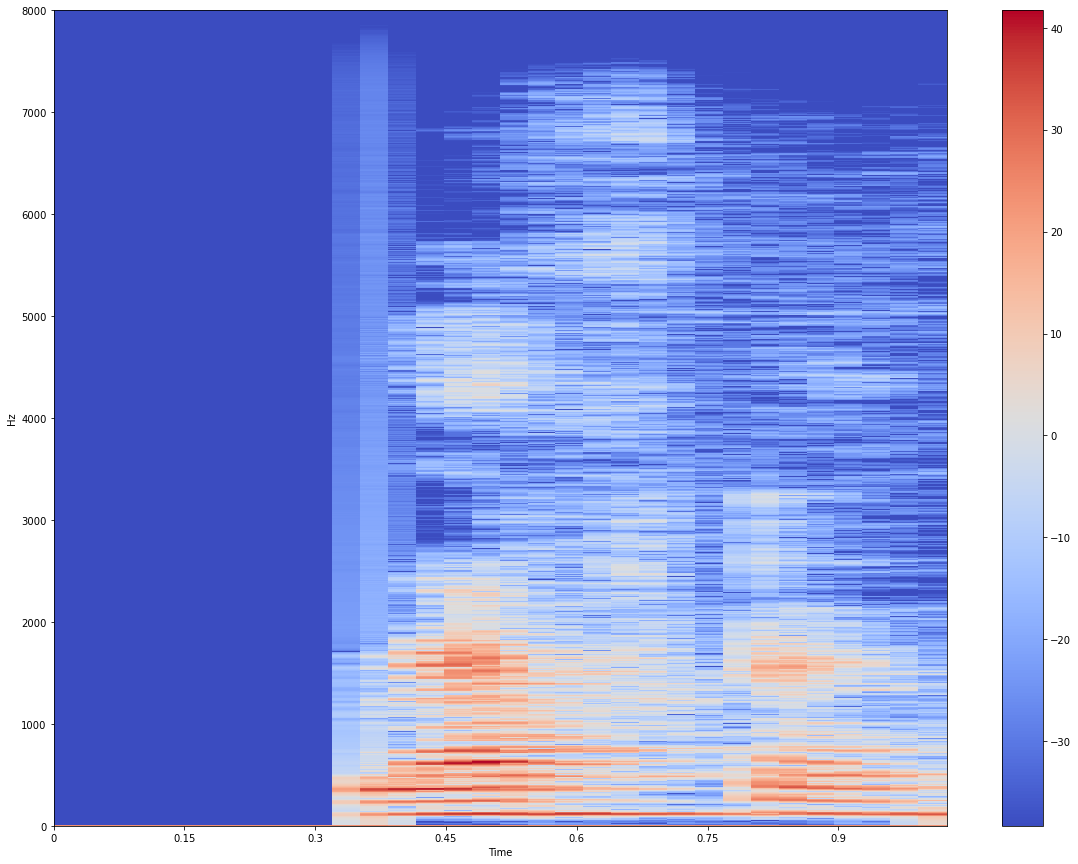

In [9]:
show_plot(left[4])

## wave plot and spectrogram of the sound "Right"

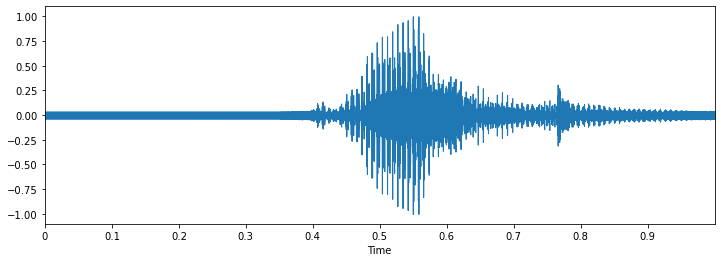

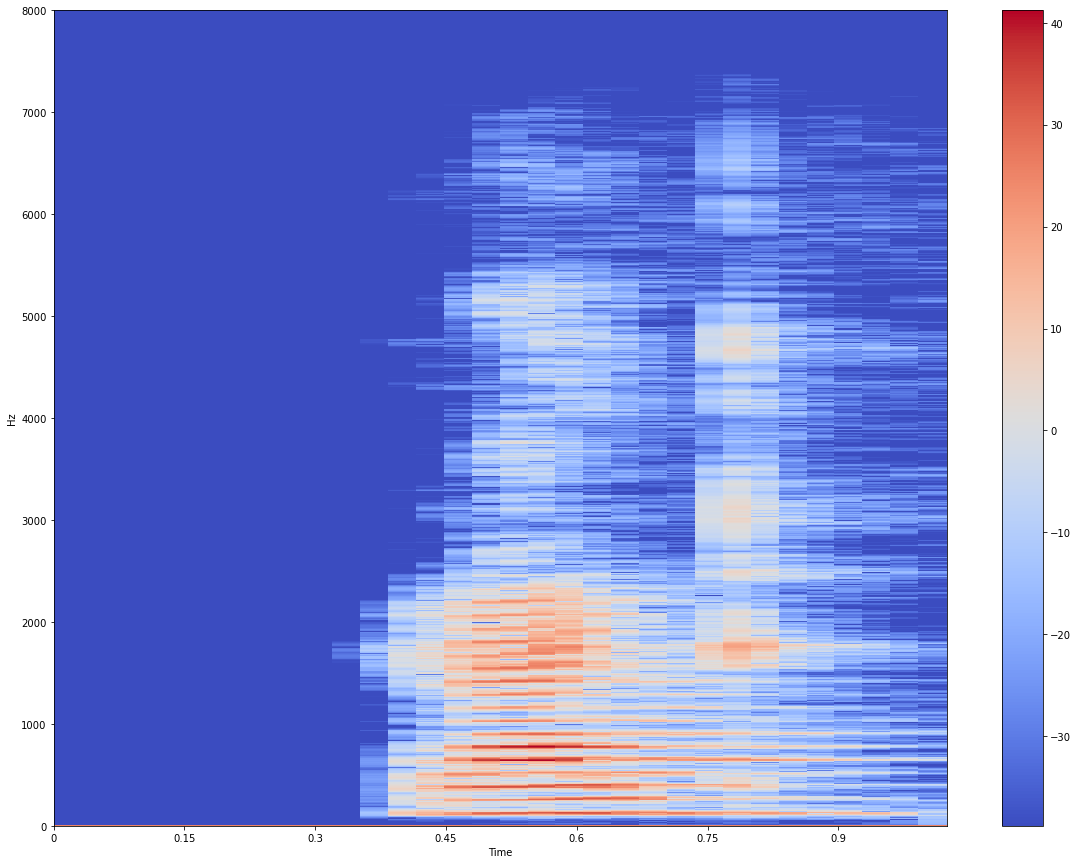

In [10]:
show_plot(right[0])

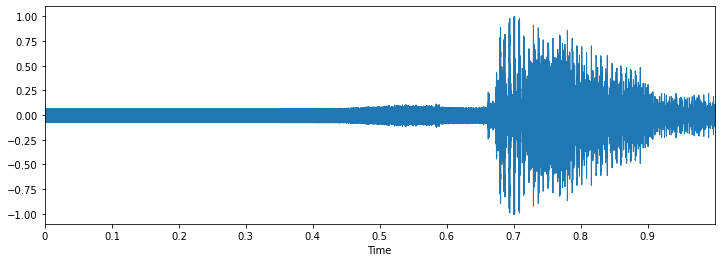

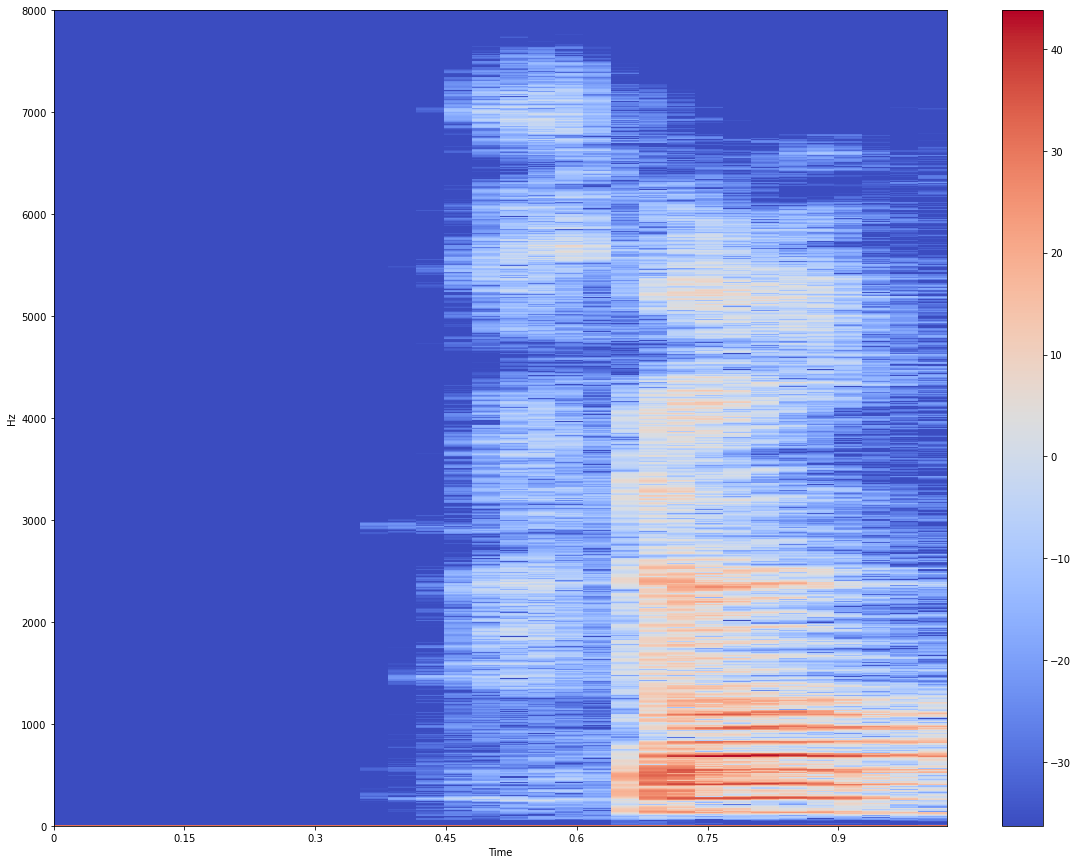

In [11]:
show_plot(stop[0])

## preprocessing of audio

### Normalization

In [12]:
import sklearn.preprocessing
def normalize(x):
    return sklearn.preprocessing.minmax_scale(x, axis=0)

In [13]:
for item in forward:
    item[0] = normalize(item[0])

In [14]:
for item in back:
    item[0] = normalize(item[0])

In [15]:
for item in left:
    item[0] = normalize(item[0])

In [16]:
for item in right:
    item[0] = normalize(item[0])

In [17]:
for item in stop:
    item[0] = normalize(item[0])

## Pre-emphasis

In [22]:
def preemp(soundList):
    for item in soundList:
        item[0] = librosa.effects.preemphasis(item[0])

In [23]:
preemp(forward)
preemp(back)
preemp(left)
preemp(right)
preemp(stop)

# now plotting the audio again and obeserving the changes

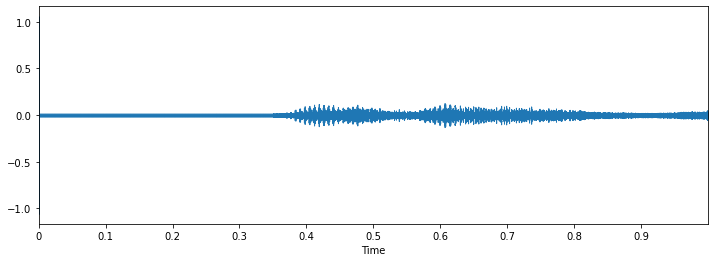

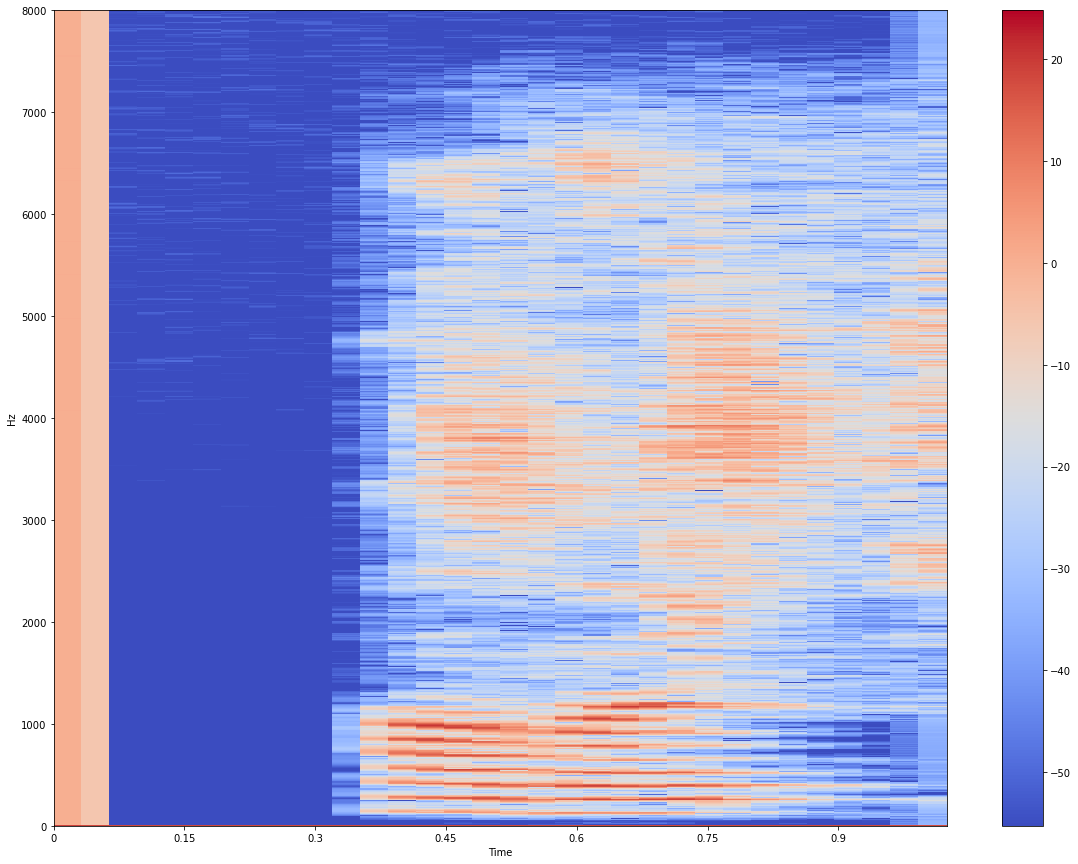

In [25]:
show_plot(forward[0])

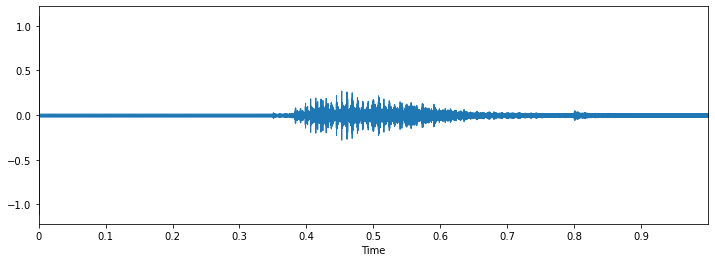

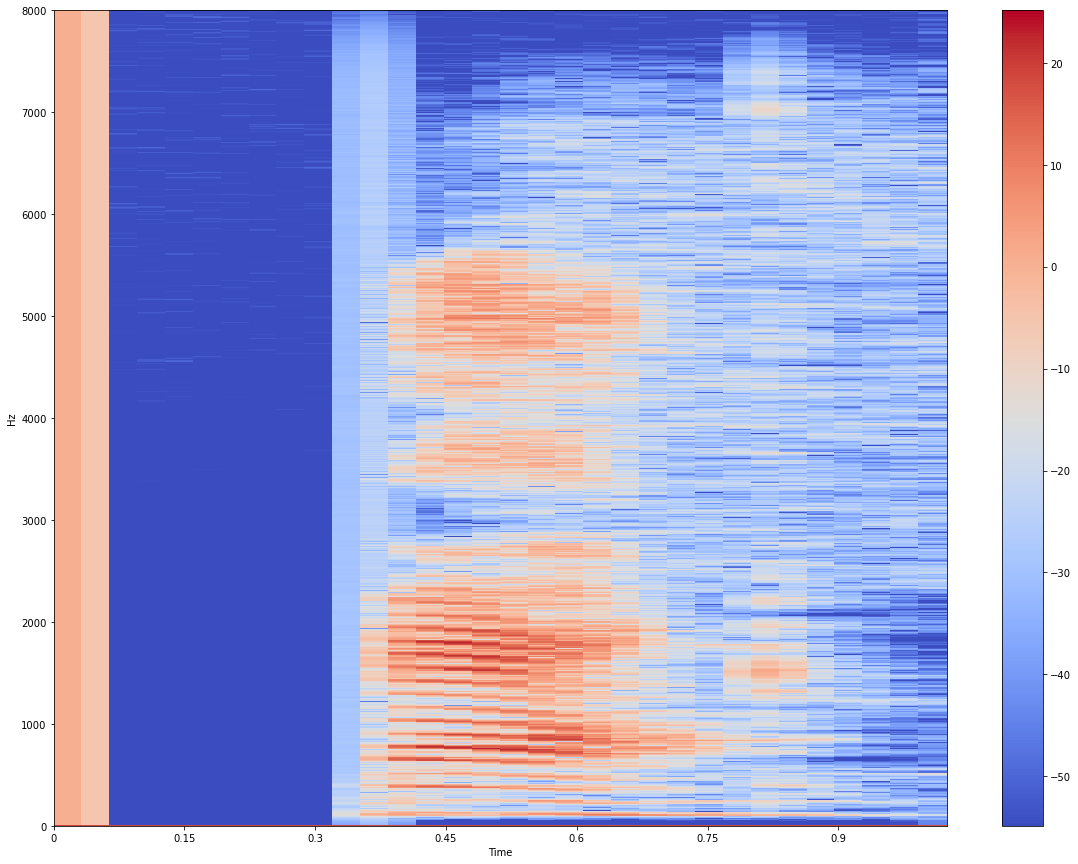

In [26]:
show_plot(back[0])

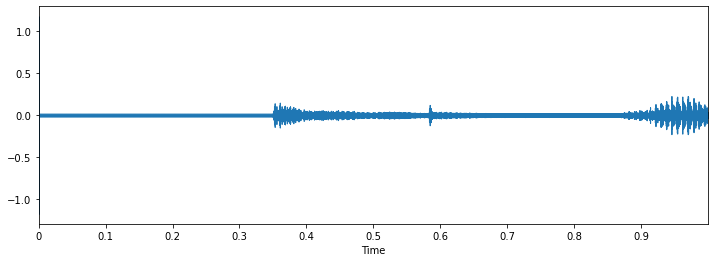

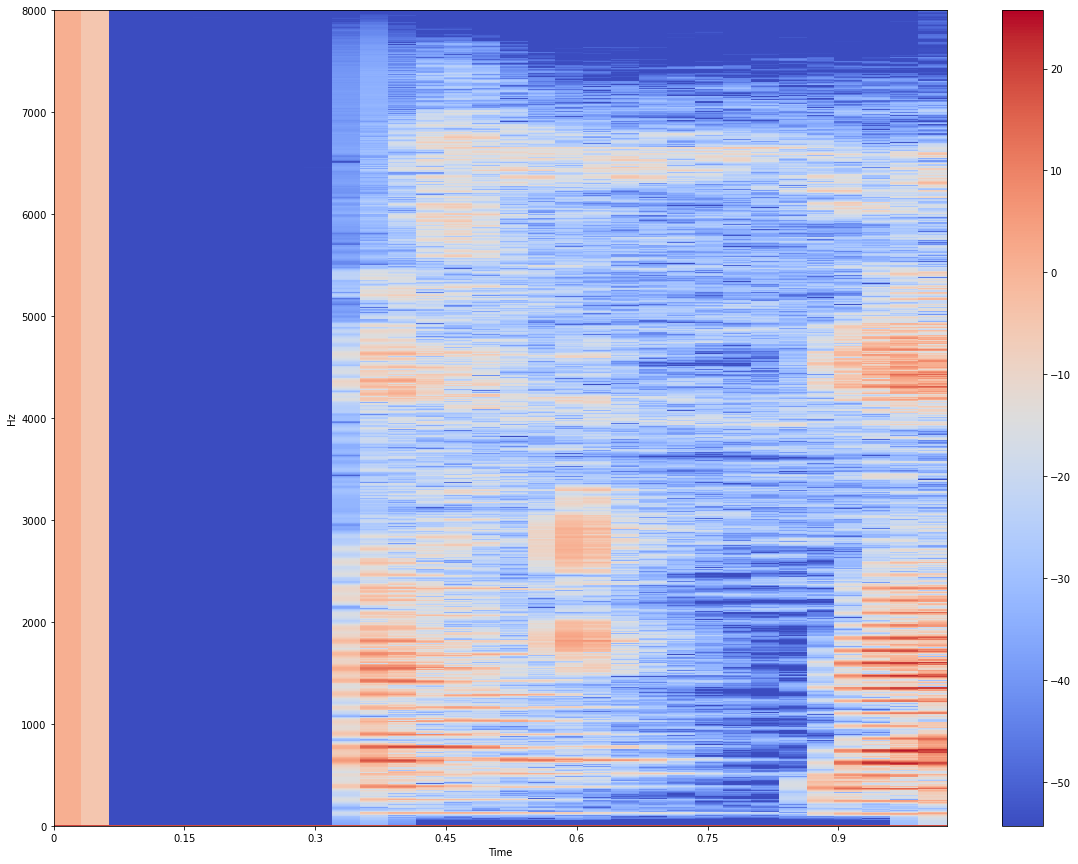

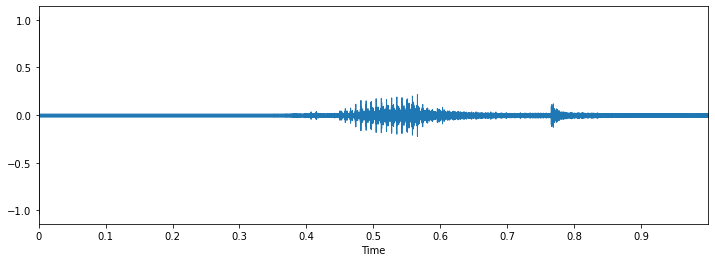

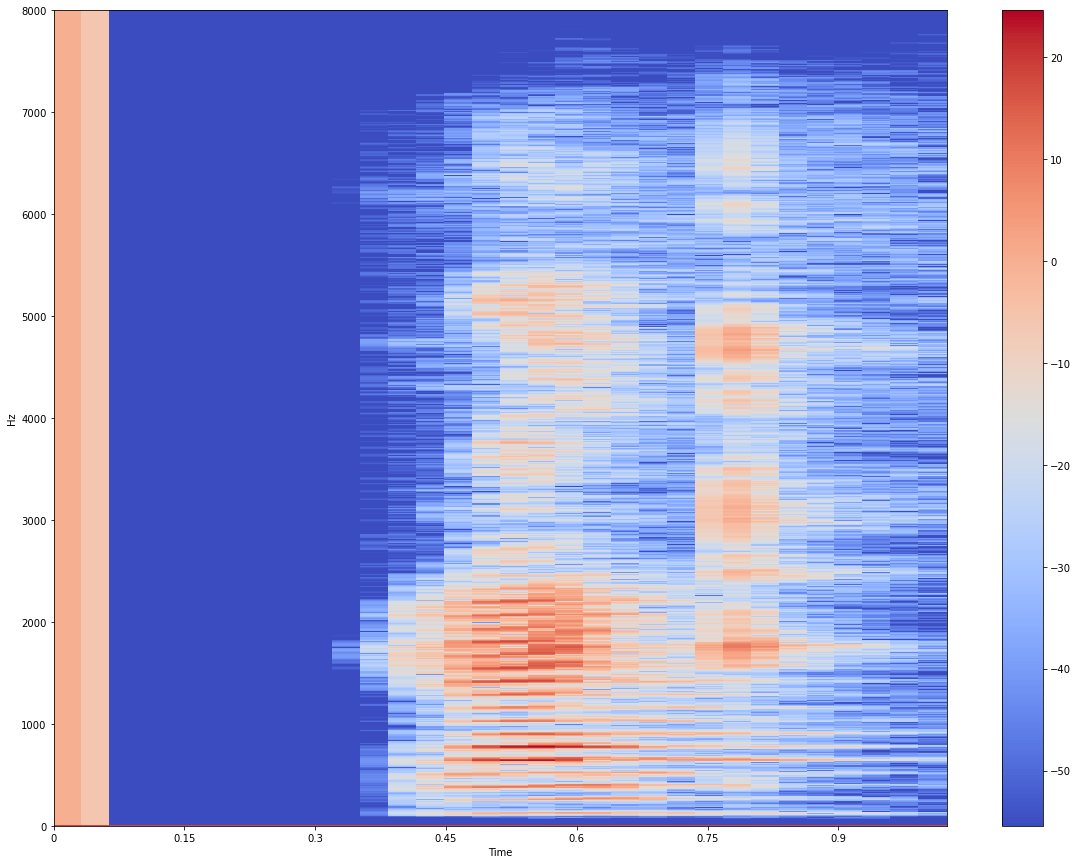

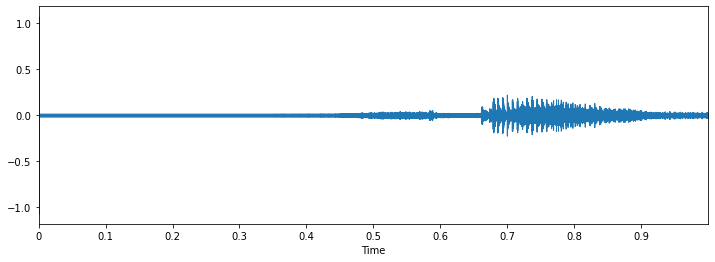

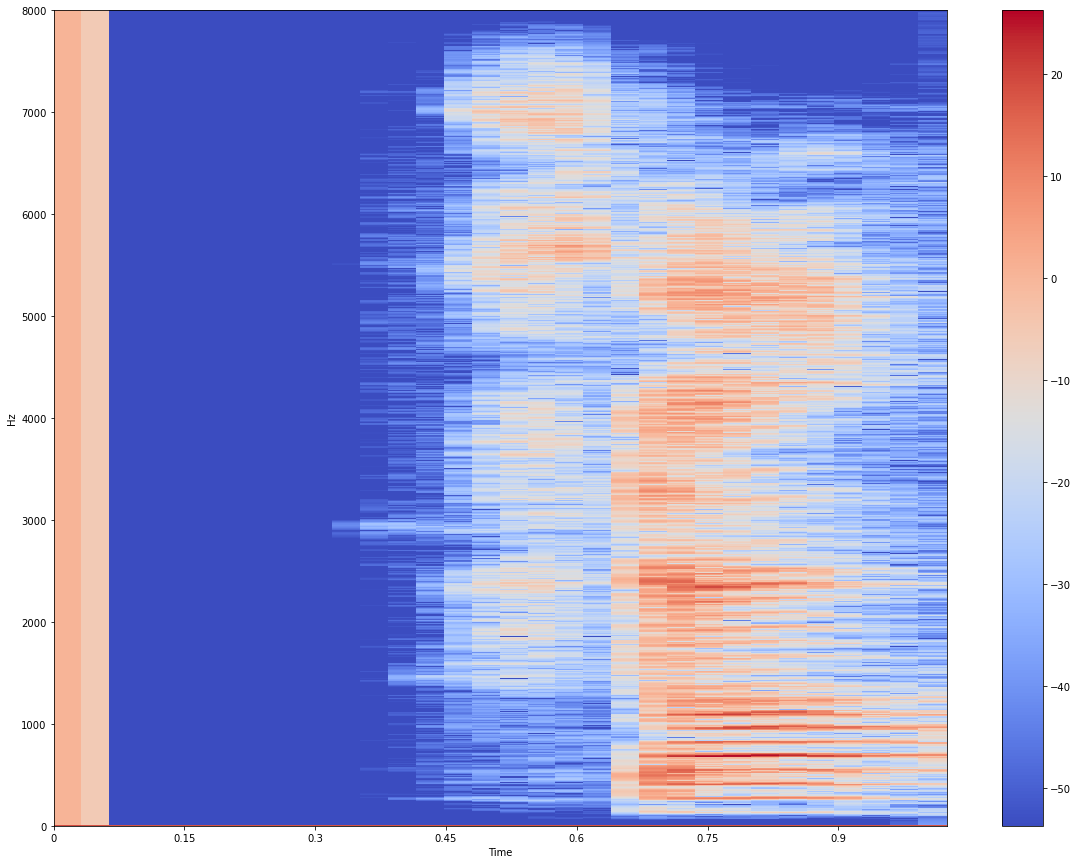

In [27]:
show_plot(left[0])
show_plot(right[0])
show_plot(stop[0])